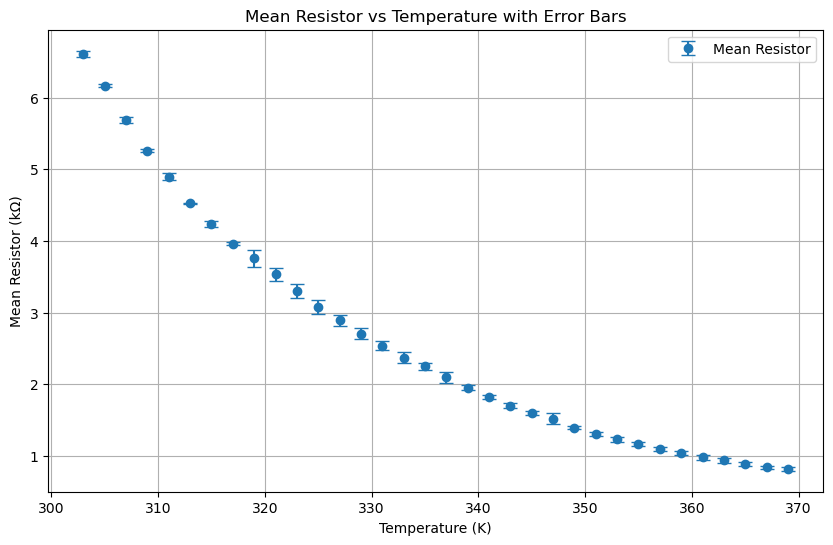

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path ="C:\\Users\\narth\\Downloads\\experiment04datasetpart01.xlsx"
  # Replace with your file path
df = pd.read_excel(file_path)

# Extract the relevant columns
temperature = df.iloc[:, 0]  # First column (Temperature)
mean_resistor = df.iloc[:, 6]  # 7th column (Mean Resistor)
error = df.iloc[:, 7]  # 6th column (Error)

# Create scatter plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(temperature, mean_resistor, yerr=error, fmt='o', capsize=5, label='Mean Resistor')
plt.xlabel('Temperature (K)')
plt.ylabel('Mean Resistor (kΩ)')
plt.title('Mean Resistor vs Temperature with Error Bars')
plt.grid(True)
plt.legend()
plt.show()

# Calculate 1/Temperature
inverse_temperature = 1 / temperature

# Calculate ln(Mean Resistor)
ln_mean_resistor = np.log(mean_resistor)




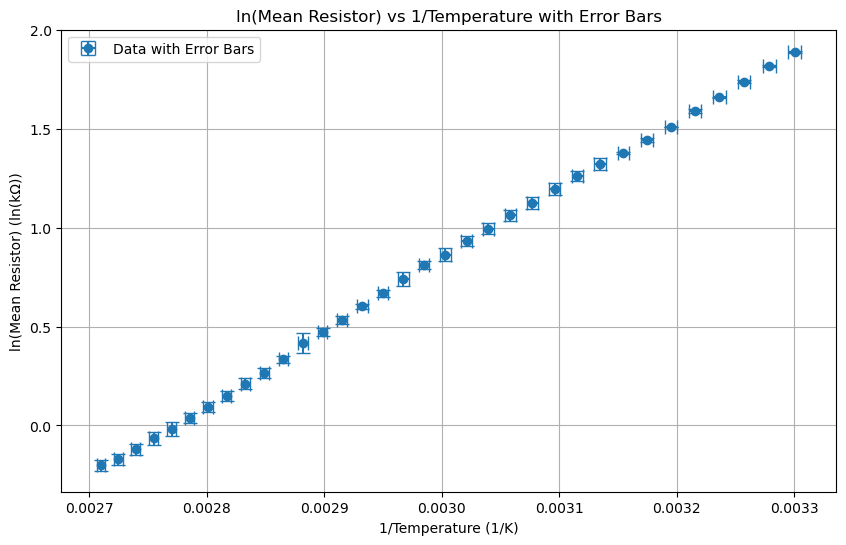

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:\\Users\\narth\\Downloads\\experiment04datasetpart01.xlsx"  # Replace with your file path
df = pd.read_excel(file_path)

# Extract the relevant columns
temperature = df.iloc[:, 0]  # First column (Temperature)
mean_resistor = df.iloc[:, 6]  # 7th column (Mean Resistor)
error_resistor = df.iloc[:, 7]  # 8th column (Error of Mean Resistor)
error_temperature = 0.5

# Calculate 1/Temperature
inverse_temperature = 1 / temperature

# Calculate ln(Mean Resistor)
ln_mean_resistor = np.log(mean_resistor)

# Calculate the error in 1/Temperature
error_inverse_temperature = error_temperature / (temperature ** 2)

# Calculate the error in ln(Mean Resistor)
error_ln_mean_resistor = error_resistor / mean_resistor

# Add the new arrays to the DataFrame
df['1/Temperature'] = inverse_temperature
df['ln(Mean Resistor)'] = ln_mean_resistor
df['Error(1/Temperature)'] = error_inverse_temperature
df['Error(ln(Mean Resistor))'] = error_ln_mean_resistor

# Plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(inverse_temperature, ln_mean_resistor, 
             xerr=error_inverse_temperature, yerr=error_ln_mean_resistor, 
             fmt='o', capsize=5, label='Data with Error Bars')

plt.xlabel('1/Temperature (1/K)')
plt.ylabel('ln(Mean Resistor) (ln(kΩ))')
plt.title('ln(Mean Resistor) vs 1/Temperature with Error Bars')
plt.grid(True)
plt.legend()
plt.show()


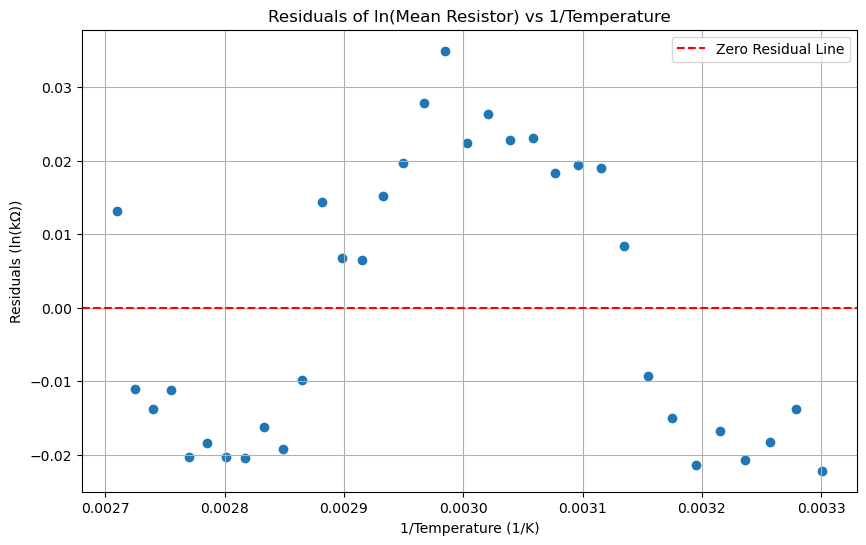

In [92]:
# Calculate the predicted values (y_pred) from the regression line
predicted_ln_mean_resistor = slope * inverse_temperature + intercept

# Calculate the residuals
residuals = ln_mean_resistor - predicted_ln_mean_resistor

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(inverse_temperature, residuals)

# Add a horizontal line at 0 for reference
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')

plt.xlabel('1/Temperature (1/K)')
plt.ylabel('Residuals (ln(kΩ))')
plt.title('Residuals of ln(Mean Resistor) vs 1/Temperature')
plt.grid(True)
plt.legend()
plt.show()







Slope (gradient): 3599.6082209890264 ± 18.741987955517672
Intercept: -9.969135262904148 ± 0.05606726234114687


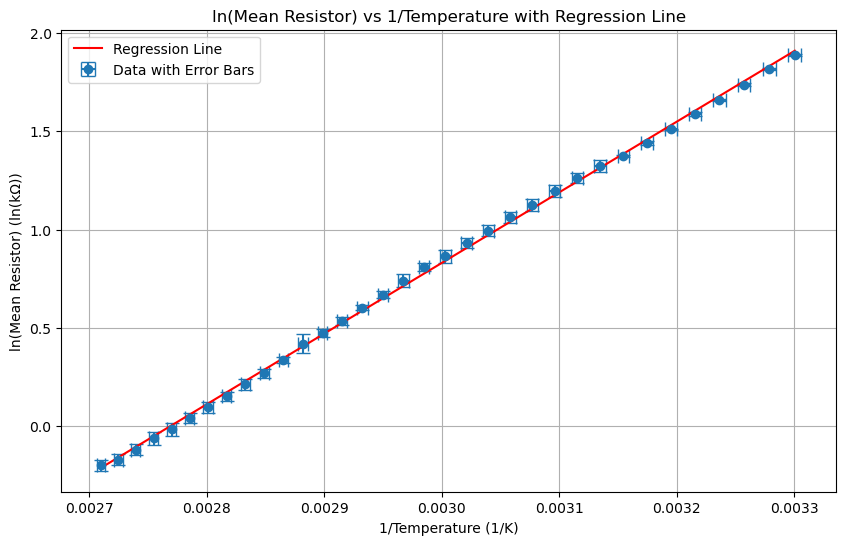

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the Excel file
file_path = "C:\\Users\\narth\\Downloads\\experiment04datasetpart01.xlsx"  # Replace with your file path
df = pd.read_excel(file_path)

# Extract the relevant columns
temperature = df.iloc[:, 0]  # First column (Temperature)
mean_resistor = df.iloc[:, 6]  # 7th column (Mean Resistor)
error_resistor = df.iloc[:, 7]  # 8th column (Error of Mean Resistor)
error_temperature = 0.5 # Assuming the 2nd column contains temperature errors

# Calculate 1/Temperature
inverse_temperature = 1 / temperature

# Calculate ln(Mean Resistor)
ln_mean_resistor = np.log(mean_resistor)

# Calculate the error in 1/Temperature
error_inverse_temperature = error_temperature / (temperature ** 2)

# Calculate the error in ln(Mean Resistor)
error_ln_mean_resistor = error_resistor / mean_resistor

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(inverse_temperature, ln_mean_resistor)

# Calculate the error in the slope (gradient) and intercept
n = len(inverse_temperature)
mean_x = np.mean(inverse_temperature)
SSxx = np.sum((inverse_temperature - mean_x) ** 2)
s_yx = np.sqrt(np.sum((ln_mean_resistor - (slope * inverse_temperature + intercept)) ** 2) / (n - 2))

slope_error = s_yx / np.sqrt(SSxx)
intercept_error = s_yx * np.sqrt(1/n + (mean_x ** 2) / SSxx)

# Print the results
print(f"Slope (gradient): {slope} ± {slope_error}")
print(f"Intercept: {intercept} ± {intercept_error}")

# Plot the data with error bars and the regression line
plt.figure(figsize=(10, 6))
plt.errorbar(inverse_temperature, ln_mean_resistor, 
             xerr=error_inverse_temperature, yerr=error_ln_mean_resistor, 
             fmt='o', capsize=5, label='Data with Error Bars')

# Plot the regression line
regression_line = slope * inverse_temperature + intercept
plt.plot(inverse_temperature, regression_line, color='red', label=f'Regression Line')

plt.xlabel('1/Temperature (1/K)')
plt.ylabel('ln(Mean Resistor) (ln(kΩ))')
plt.title('ln(Mean Resistor) vs 1/Temperature with Regression Line')
plt.grid(True)
plt.legend()
plt.show()


In [14]:
print( r_value)


0.9995665306744121


In [16]:
import numpy as np
from scipy.stats import pearsonr

# Example actual and predicted data
# ln_mean_resistor = np.array([...]) # Your actual ln(R_T) values
# predicted_ln_R_model = np.array([...]) # Your predicted ln(R_T) values from the model

# Calculate the Pearson correlation coefficient (r-value)
r_value, _ = pearsonr(ln_mean_resistor, predicted_ln_R_model)

print(f"Pearson correlation coefficient (r-value): {r_value}")


Pearson correlation coefficient (r-value): 0.9997822151895297


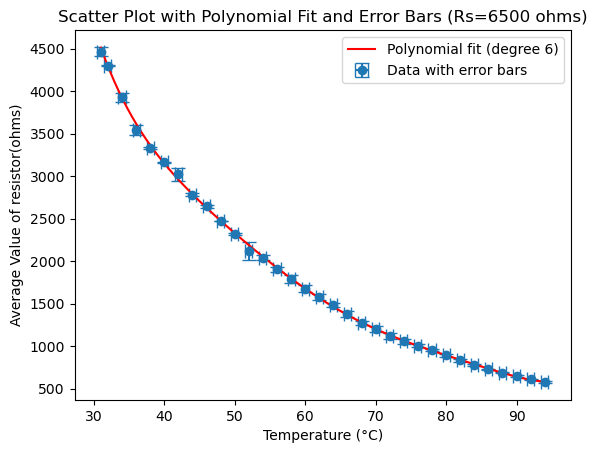

Fitted coefficients: [ 7.84815615e-07 -3.13025336e-04  5.10576118e-02 -4.36006675e+00
  2.06455827e+02 -5.23496860e+03  5.93947109e+04]


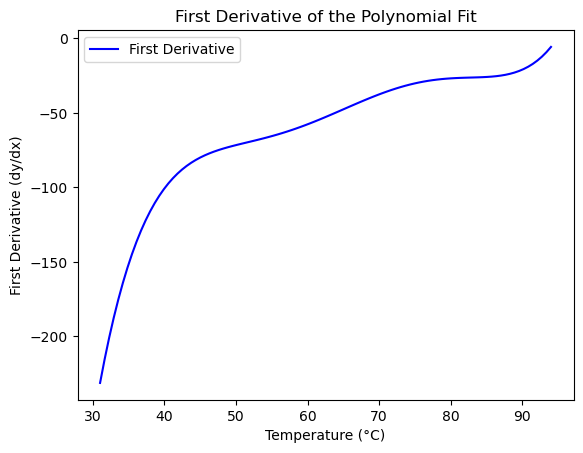

First derivative coefficients: [ 1.93215839e-07 -6.85914313e-05  1.01442007e-02 -8.00510963e-01
  3.50282680e+01 -7.19138983e+02]


In [76]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Update the file path to where your file is located
file_path = r"C:\Users\narth\Downloads\heating_cooling_data_6500.xlsx"  # Example for Windows

data = pd.read_excel(file_path)

# Extract the relevant columns
x = data['Temperature']  # Temperature column (x-axis)
y = data['average']  # Average column (y-axis)
x_err = 0.5  # Error in Temperature (x-axis)
y_err = data['std']  # Standard deviation column (y-axis)

# Define a polynomial function to fit
def poly_func(x, *coeffs):
    return np.polyval(coeffs, x)

# Perform polynomial regression of degree 2 (for example)
degree = 6
initial_guess = np.ones(degree + 1)  # Initial guess for the polynomial coefficients

# Curve fitting considering the error bars in y
popt, pcov = curve_fit(poly_func, x, y, sigma=y_err, p0=initial_guess)

# Generate x values for the fitted curve
x_fit_1 = np.linspace(min(x), max(x), 100)
y_fit_1 = poly_func(x_fit, *popt)

# Scatter plot with error bars
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', capsize=5, label='Data with error bars')

# Plot the fitted polynomial curve
plt.plot(x_fit_1, y_fit_1, label=f'Polynomial fit (degree {degree})', color='red')

# Labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Average Value of resistor(ohms)')
plt.title('Scatter Plot with Polynomial Fit and Error Bars (Rs=6500 ohms)')
plt.legend()

# Show the plot
plt.show()

# Print the fitted coefficients
print(f"Fitted coefficients: {popt}")

# Now, calculate the first derivative of the polynomial
p_derivative_1 = np.polyder(popt)  # This computes the derivative of the polynomial

# Generate y values for the derivative
y_derivative_1 = np.polyval(p_derivative_1, x_fit)

# Plot the first derivative
plt.plot(x_fit_1, y_derivative_1, label='First Derivative', color='blue')

# Labels and title for the derivative plot
plt.xlabel('Temperature (°C)')
plt.ylabel('First Derivative (dy/dx)')
plt.title('First Derivative of the Polynomial Fit')
plt.legend()
plt.show()

# Print the first derivative coefficients
print(f"First derivative coefficients: {p_derivative}")


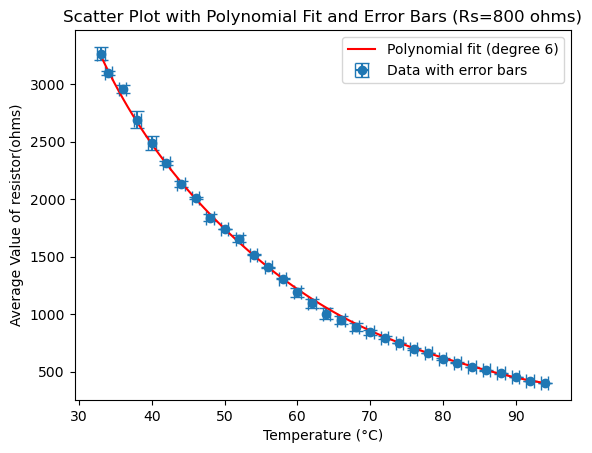

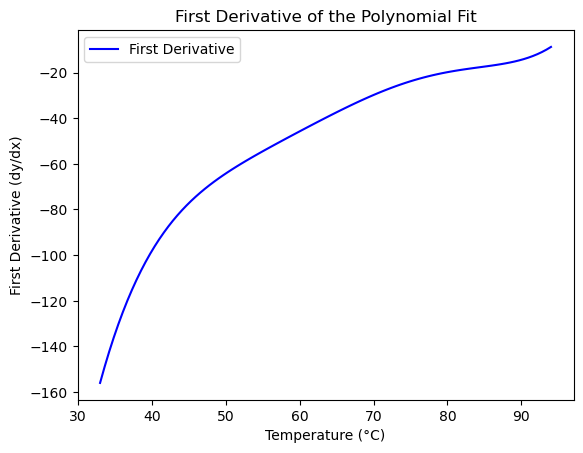

First derivative coefficients: [ 1.93215839e-07 -6.85914313e-05  1.01442007e-02 -8.00510963e-01
  3.50282680e+01 -7.19138983e+02]


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Update the file path to where your file is located
file_path = r"C:\Users\narth\Downloads\heating_cooling_data_800.xlsx"  # Example for Windows

data = pd.read_excel(file_path)

# Extract the relevant columns
x = data['Temperature']  # Temperature column (x-axis)
y = data['average']  # Average column (y-axis)
x_err = 0.5  # Error in Temperature (x-axis)
y_err = data['std']  # Standard deviation column (y-axis)

# Define a polynomial function to fit
def poly_func(x, *coeffs):
    return np.polyval(coeffs, x)

# Perform polynomial regression of degree 2 (for example)
degree = 6
initial_guess = np.ones(degree + 1)  # Initial guess for the polynomial coefficients

# Curve fitting considering the error bars in y
popt, pcov = curve_fit(poly_func, x, y, sigma=y_err, p0=initial_guess)

# Generate x values for the fitted curve
x_fit_2 = np.linspace(min(x), max(x), 100)
y_fit_2 = poly_func(x_fit_2, *popt)

# Scatter plot with error bars
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', capsize=5, label='Data with error bars')

# Plot the fitted polynomial curve
plt.plot(x_fit_2, y_fit_2, label=f'Polynomial fit (degree {degree})', color='red')

# Labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Average Value of resistor(ohms)')
plt.title('Scatter Plot with Polynomial Fit and Error Bars (Rs=800 ohms)')
plt.legend()

# Show the plot
plt.show()

# Now, calculate the first derivative of the polynomial
p_derivative_1 = np.polyder(popt)  # This computes the derivative of the polynomial

# Generate y values for the derivative
y_derivative_2 = np.polyval(p_derivative_1, x_fit)

# Plot the first derivative
plt.plot(x_fit_2, y_derivative_2, label='First Derivative', color='blue')

# Labels and title for the derivative plot
plt.xlabel('Temperature (°C)')
plt.ylabel('First Derivative (dy/dx)')
plt.title('First Derivative of the Polynomial Fit')
plt.legend()
plt.show()

# Print the first derivative coefficients
print(f"First derivative coefficients: {p_derivative}")

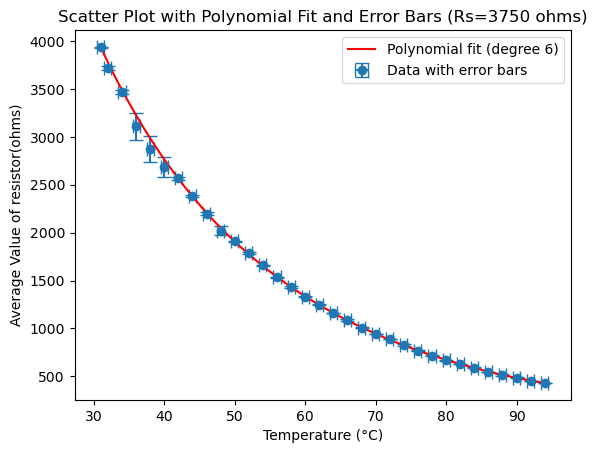

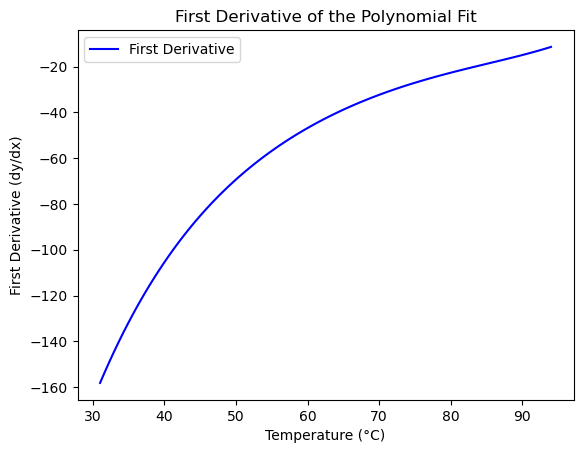

First derivative coefficients: [ 1.93215839e-07 -6.85914313e-05  1.01442007e-02 -8.00510963e-01
  3.50282680e+01 -7.19138983e+02]


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Update the file path to where your file is located
file_path = r"C:\Users\narth\Downloads\heating_cooling_data_3750.xlsx" # Example for Windows

data = pd.read_excel(file_path)

# Extract the relevant columns
x = data['Temperature']  # Temperature column (x-axis)
y = data['average']  # Average column (y-axis)
x_err = 0.5  # Error in Temperature (x-axis)
y_err = data['std']  # Standard deviation column (y-axis)

# Define a polynomial function to fit
def poly_func(x, *coeffs):
    return np.polyval(coeffs, x)

# Perform polynomial regression of degree 2 (for example)
degree = 6
initial_guess = np.ones(degree + 1)  # Initial guess for the polynomial coefficients

# Curve fitting considering the error bars in y
popt, pcov = curve_fit(poly_func, x, y, sigma=y_err, p0=initial_guess)

# Generate x values for the fitted curve
x_fit_3 = np.linspace(min(x), max(x), 100)
y_fit_3 = poly_func(x_fit_3, *popt)

# Scatter plot with error bars
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', capsize=5, label='Data with error bars')

# Plot the fitted polynomial curve
plt.plot(x_fit_3, y_fit_3, label=f'Polynomial fit (degree {degree})', color='red')

# Labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Average Value of resistor(ohms)')
plt.title('Scatter Plot with Polynomial Fit and Error Bars (Rs=3750 ohms)')
plt.legend()

# Show the plot
plt.show()

# Now, calculate the first derivative of the polynomial
p_derivative_3 = np.polyder(popt)  # This computes the derivative of the polynomial

# Generate y values for the derivative
y_derivative_3 = np.polyval(p_derivative_3, x_fit)

# Plot the first derivative
plt.plot(x_fit_3, y_derivative_3, label='First Derivative', color='blue')

# Labels and title for the derivative plot
plt.xlabel('Temperature (°C)')
plt.ylabel('First Derivative (dy/dx)')
plt.title('First Derivative of the Polynomial Fit')
plt.legend()
plt.show()

# Print the first derivative coefficients
print(f"First derivative coefficients: {p_derivative}")

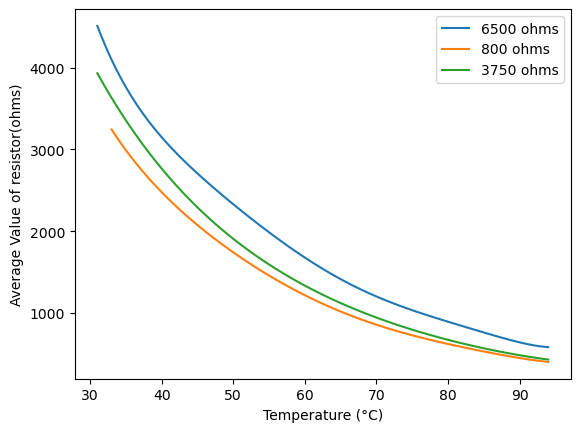

In [79]:
plt.plot(x_fit_1, y_fit_1,label='6500 ohms')
plt.plot(x_fit_2, y_fit_2,label='800 ohms')
plt.plot(x_fit_3, y_fit_3,label='3750 ohms')
# Labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Average Value of resistor(ohms)')
plt.legend()
plt.show()


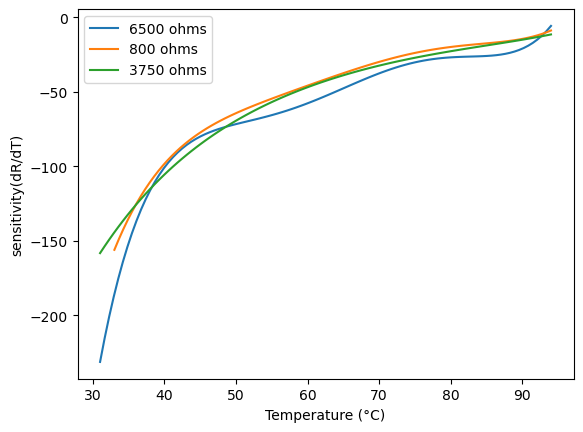

In [80]:

plt.plot(x_fit_1,y_derivative_1 ,label='6500 ohms')
plt.plot(x_fit_2, y_derivative_2,label='800 ohms')
plt.plot(x_fit_3, y_derivative_3,label='3750 ohms')
# Labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('sensitivity(dR/dT)')
plt.legend()
plt.show()




E:\jupiter\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


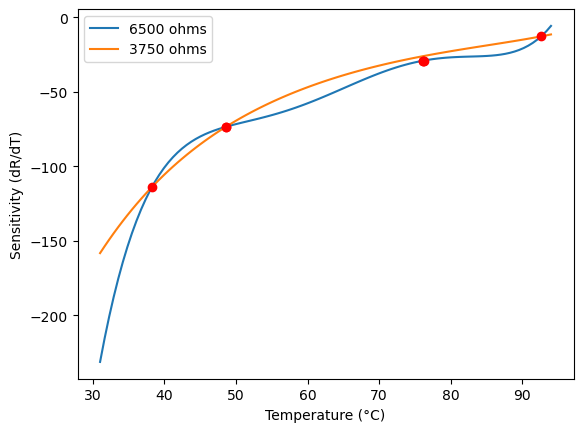

Intersection temperatures: [38.251579794766776, 48.578052690059565, 48.57805269005957, 76.17724707922362, 76.19507210684566, 76.06197660330871, 92.61794986944086]


In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Assume y_derivative_1, y_derivative_3, x_fit_1, and x_fit_3 are given

# Create interpolation functions for the derivatives
interp_6500 = interp1d(x_fit_1, y_derivative_1, kind='linear', fill_value='extrapolate')
interp_3750 = interp1d(x_fit_3, y_derivative_3, kind='linear', fill_value='extrapolate')

# Define the difference function
def intersection_func(x):
    return interp_6500(x) - interp_3750(x)

# Generate guesses within the range of x_fit_1
x_guesses = np.linspace(min(x_fit_1), max(x_fit_1), 10)

# Find the intersection points
x_intersections = []
for x_guess in x_guesses:
    x_root = fsolve(intersection_func, x_guess)[0]
    if min(x_fit_1) <= x_root <= max(x_fit_1) and x_root not in x_intersections:
        x_intersections.append(x_root)

# Plot the curves
plt.plot(x_fit_1, y_derivative_1, label='6500 ohms')
plt.plot(x_fit_3, y_derivative_3, label='3750 ohms')

# Plot the intersection points
for x_int in x_intersections:
    plt.plot(x_int, interp_6500(x_int), 'ro')  # Plot the intersection points in red

# Labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Sensitivity (dR/dT)')
plt.legend()
plt.show()

# Print intersection points
print(f"Intersection temperatures: {x_intersections}")


a: -14.24107676055635 ± 0.7721314469368771
b: 6458.605092696967 ± 516.2183741115377
c: -476706.6363846499 ± 86044.37202396609


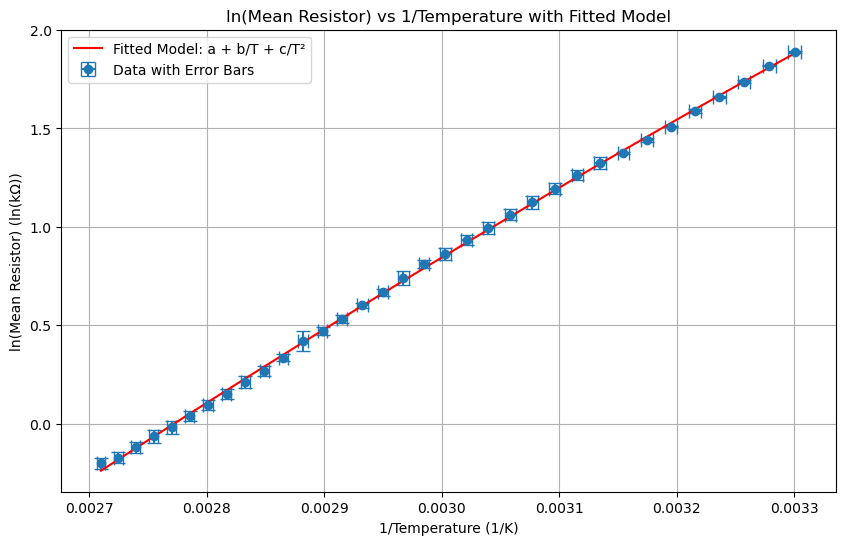

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the Excel file
file_path = "C:\\Users\\narth\\Downloads\\experiment04datasetpart01.xlsx"  # Replace with your file path
df = pd.read_excel(file_path)

# Extract the relevant columns
temperature = df.iloc[:, 0]  # First column (Temperature)
mean_resistor = df.iloc[:, 6]  # 7th column (Mean Resistor)
error_resistor = df.iloc[:, 7]  # 8th column (Error of Mean Resistor)
error_temperature = 0.5 # Assuming the 2nd column contains temperature errors

# Calculate 1/Temperature
inverse_temperature = 1 / temperature

# Calculate ln(Mean Resistor)
ln_mean_resistor = np.log(mean_resistor)

# Define the model function
def model(inverse_temp, a, b, c):
    return a + b * inverse_temp + c * inverse_temp**2

# Perform curve fitting
initial_guess = [0, 0, 0]  # Initial guess for a, b, c
params, covariance = curve_fit(model, inverse_temperature, ln_mean_resistor, p0=initial_guess)

# Extract the fitted parameters and their uncertainties
a, b, c = params
param_errors = np.sqrt(np.diag(covariance))

# Print the results
print(f"a: {a} ± {param_errors[0]}")
print(f"b: {b} ± {param_errors[1]}")
print(f"c: {c} ± {param_errors[2]}")

# Plot the data with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(inverse_temperature, ln_mean_resistor, 
             xerr=error_temperature / temperature**2, yerr=error_resistor / mean_resistor, 
             fmt='o', capsize=5, label='Data with Error Bars')

# Plot the fitted curve
fitted_curve = model(inverse_temperature, a, b, c)
plt.plot(inverse_temperature, fitted_curve, color='red', label=f'Fitted Model: a + b/T + c/T²')

plt.xlabel('1/Temperature (1/K)')
plt.ylabel('ln(Mean Resistor) (ln(kΩ))')
plt.title('ln(Mean Resistor) vs 1/Temperature with Fitted Model')
plt.grid(True)
plt.legend()
plt.show()


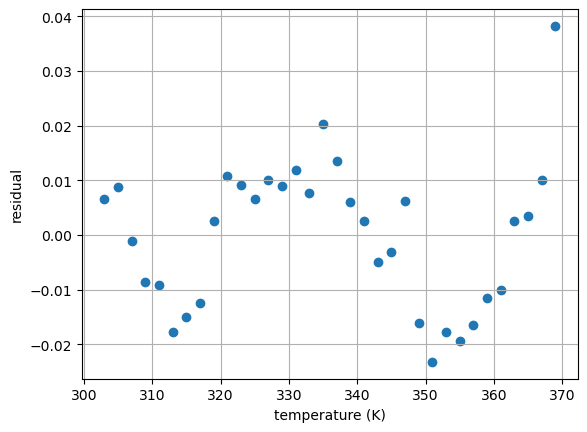

In [100]:
# Calculate the fitted values
fitted_values = model(inverse_temperature, a, b, c)

# Calculate the residuals
residuals = ln_mean_resistor - fitted_values

plt.scatter(temperature,residuals)
plt.ylabel("residual")
plt.xlabel("temperature (K)")
plt.grid()

In [99]:
import numpy as np
from scipy.stats import pearsonr

# Example actual and predicted data
# ln_mean_resistor = np.array([...]) # Your actual ln(R_T) values
# predicted_ln_R_model = np.array([...]) # Your predicted ln(R_T) values from the model

# Calculate the Pearson correlation coefficient (r-value)
r_value, _ = pearsonr(ln_mean_resistor,fitted_values)

print(f"Pearson correlation coefficient (r-value): {r_value}")

Pearson correlation coefficient (r-value): 0.9997822151895299
